In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats.mstats import mquantiles
from scipy.stats import kurtosis
from scipy.stats import probplot

In [56]:
df1 = pd.read_csv('babies.txt', delim_whitespace=True)
df2 = pd.read_csv('babies23.txt', delim_whitespace=True)

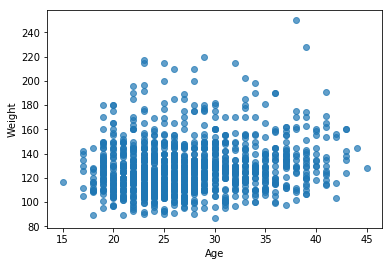

In [63]:
df1 = df1[(df1['weight'] < 999) & (df1['age'] < 99)]

age = np.array(df1['age'])
weight = np.array(df1['weight'])

plt.scatter(age, weight, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [64]:
bwt_ns_1= list(df1[df1['smoke'] == 0]['bwt'])
bwt_s_1 = list(df1[df1['smoke'] == 1]['bwt'])

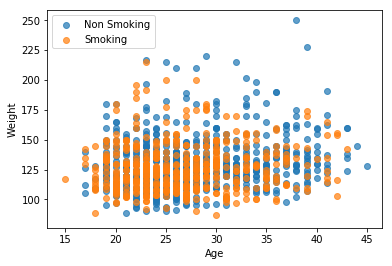

In [68]:
age = np.array(df1[df1['smoke'] == 0]['age'])
weight = np.array(df1[df1['smoke'] == 0]['weight'])
plt.scatter(age, weight, alpha=0.7, label='Non Smoking')

age = np.array(df1[df1['smoke'] == 1]['age'])
weight = np.array(df1[df1['smoke'] == 1]['weight'])
plt.scatter(age, weight, alpha=0.7, label='Smoking')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [5]:
bwt_ns = bwt_ns_1
bwt_s = bwt_s_1

Get hist arrays

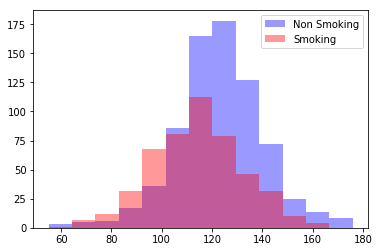

In [6]:
_, bins = np.histogram(np.stack([bwt_ns, bwt_ns]), bins=13)

plt.hist(bwt_ns, label='Non Smoking', bins=bins, alpha=0.4, color='blue')
plt.hist(bwt_s, label='Smoking', bins=bins, alpha=0.4, color='red')
plt.legend()
plt.show()

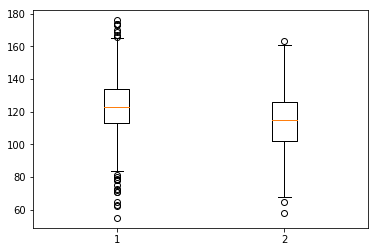

In [81]:
plt.boxplot([bwt_ns, bwt_s])
plt.show()

In [7]:
print(np.mean(bwt_ns))
print(np.var(bwt_ns))

123.04716981132076
302.30640034582717


In [8]:
print(np.mean(bwt_s))
print(np.var(bwt_s))

114.10950413223141
326.8950336384127


In [9]:
bwt_ns_sample = np.random.choice(bwt_ns, 2000, replace=True)
bwt_s_sample = np.random.choice(bwt_ns, 2000, replace=True)

ttest_ind(bwt_ns_sample, bwt_s_sample, equal_var=True)

Ttest_indResult(statistic=1.4166206277470903, pvalue=0.1566717850869473)

In [10]:
len(bwt_ns)

742

In [11]:
len(bwt_s)

484

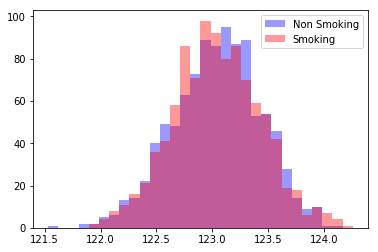

2.9507677825437093
2.9064399296976458


In [12]:
ns_means = []
s_means = []

for i in range(1000):
    ns_means.append(np.mean(np.random.choice(bwt_ns, 2000, replace=True)))
    s_means.append(np.mean(np.random.choice(bwt_ns, 2000, replace=True)))
    
_, bins = np.histogram(np.stack([ns_means, s_means]), bins=30)
plt.hist(ns_means, label='Non Smoking', bins=bins, alpha=0.4, color='blue')
plt.hist(s_means, label='Smoking', bins=bins, alpha=0.4, color='red')
plt.legend()
plt.show()

print(kurtosis(ns_means, fisher=False))
print(kurtosis(s_means, fisher=False))

In [13]:
mquantiles(bwt_ns)

array([113., 123., 134.])

In [14]:
mquantiles(bwt_s)

array([102., 115., 126.])

In [15]:
print(kurtosis(bwt_ns, fisher=False))
print(kurtosis(bwt_s, fisher=False))

4.037060312433822
2.988032478793404


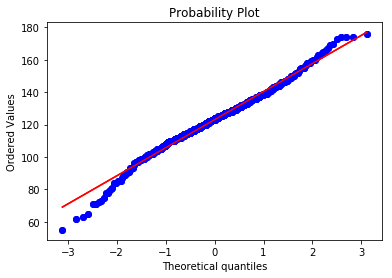

In [21]:
probplot(bwt_ns, plot=plt)
plt.show()

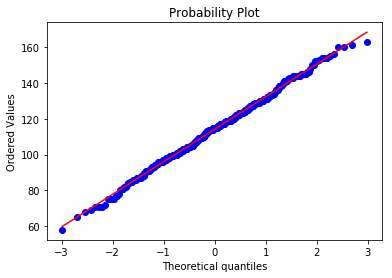

In [23]:
probplot(bwt_s, plot=plt)
plt.show()